# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    
## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.

$$
\hat{p} = \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)\\
\sigma():\:logistic\,함수,\quad \mathbf{W}:\:가중치,\quad \mathbf{x}:\:입력 특성
$$

- ### 로지스틱 함수
    - 0과 1사이의 실수를 반환한다.
    - S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

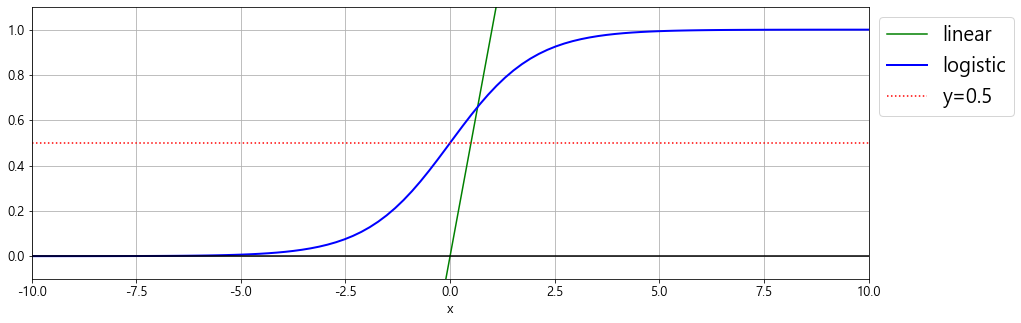

In [4]:
import matplotlib.pyplot as plt

xx = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-xx))

plt.figure(figsize=(15, 5))

plt.plot(xx,xx, color='g', label='linear')
plt.plot(xx, sig, color='b', linewidth=2, label="logistic")

plt.plot([-10, 10], [0, 0], color='k', linestyle='-')
plt.plot([-10, 10], [0.5, 0.5], color='r', linestyle=':', label='y=0.5')

plt.xlabel("x")
plt.legend(bbox_to_anchor=(1,1), fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

## 손실 함수(Loss Function)
- LogisticRegression의 전체 데이터 셋에 대한 손실함수는 아래공식과 같다.
- **로그 손실(log loss)**, **Binary Cross Entropy** 라고 한다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값,\quad\hat{p}:\:예측확률
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

## 최적화 
- 위 손실을 가장 적게하는 W(가중치)를 찾는다. 
- 로그 손실함수는 최소값을 찾는 정규방적식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$


In [3]:
# 로그계산 
import numpy as np 
np.log(1), np.log(0.5), np.log(0.1), np.log(0.00001) # 1보다 작은 값이 들어오면 점점 작아진다. 


(0.0, -0.6931471805599453, -2.3025850929940455, -11.512925464970229)

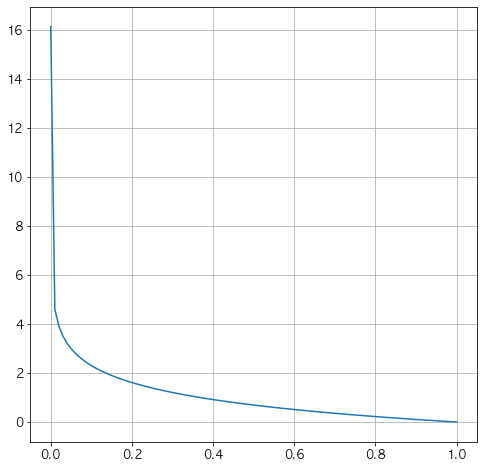

In [8]:
import matplotlib.pylab as plt
x = np.linspace(0.0000001, 1, 100) # 약0에서 1까지 100개를 나눠라 
y = - np.log(x) # 음수를 붙이면 그래프가 변한다. 

plt.figure(figsize = (8,8))
plt.plot(x, y)
plt.grid(True)
plt.show()

In [10]:
np.log(1), np.log(0.9), np.log(0.7), np.log(0.5) # 
-np.log(1), -np.log(0.9), -np.log(0.7), -np.log(0.5) # 양수로 바꾸기위해 마이너스를 붙여준다. 

(-0.0, 0.10536051565782628, 0.35667494393873245, 0.6931471805599453)

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다.
- max_iter(기본값 100) : 경사하강법 반복횟수